# Day 6

In [1]:
import requests
from bs4 import BeautifulSoup

def get_aoc_problem(day, year=2023):
    url = f"https://adventofcode.com/{year}/day/{day}"
    try:
        response = requests.get(url)
        response.raise_for_status()  # raises an exception for HTTP errors

        soup = BeautifulSoup(response.text, 'html.parser')
        
        problem_text = soup.find('article').get_text()
        return problem_text
    except Exception as e:
        return f"Error fetching problem: {e}"

day = 6
problem_prompt = get_aoc_problem(day)
print(problem_prompt)

--- Day 6: Wait For It ---The ferry quickly brings you across Island Island. After asking around, you discover that there is indeed normally a large pile of sand somewhere near here, but you don't see anything besides lots of water and the small island where the ferry has docked.
As you try to figure out what to do next, you notice a poster on a wall near the ferry dock. "Boat races! Open to the public! Grand prize is an all-expenses-paid trip to Desert Island!" That must be where the sand comes from! Best of all, the boat races are starting in just a few minutes.
You manage to sign up as a competitor in the boat races just in time. The organizer explains that it's not really a traditional race - instead, you will get a fixed amount of time during which your boat has to travel as far as it can, and you win if your boat goes the farthest.
As part of signing up, you get a sheet of paper (your puzzle input) that lists the time allowed for each race and also the best distance ever recorded

In [2]:
try:
    # Open and read the file
    with open('input.txt', 'r') as file:
        lines = file.read().strip().split('\n')

    # Print each line
    for line in lines:
        print(line)

except FileNotFoundError:
    # Specific exception for a clearer error message
    print('Input file not found.')

except Exception as e:
    # Catch other exceptions and print the error
    print(f'An error occurred: {e}')

Time:        58     81     96     76
Distance:   434   1041   2219   1218


**Time:** $t_0$
**Distance:** $d_0$

Suppose hold button for $k$ (where $k < t_0$) seconds

- Time: left $= t_0 - k$
- Speed: $k$ (mm/ms)
- Distance travelled $= k(t_0-k)$

Want to find number of values of $k$ where $k(t_0-k) > d_0$

**Idea**

Use the quadratic formula:

want to find $-k^2 + t_0k - d_0 = 0$ (values $k_1$, $k_2$)

$$k = \frac{t_0 \mp \sqrt{t_0^2 - 4d_0}}{2}$$

### Plot of solution for the first race

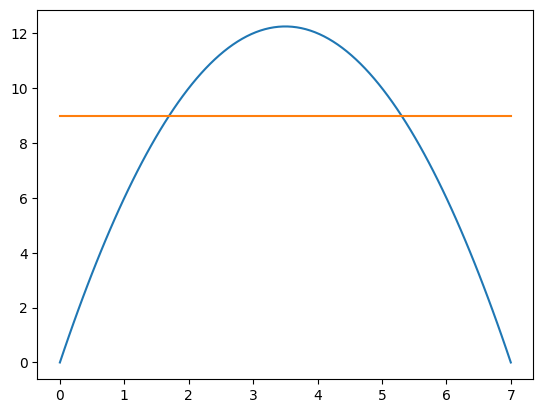

In [3]:
import numpy as np
import matplotlib.pyplot as plt

t_0 = 7
d_0 = 9

x = np.linspace(0, 7, 100)
y_quadratic = -x**2 + t_0*x 
y_horizontal = np.full_like(x, d_0)

plt.plot(x, y_quadratic, label='y = -x^2 + t_0*x')
plt.plot(x, y_horizontal, label='y = d_0')

plt.show()

### Utility functions

$$k = \frac{t_0 \mp \sqrt{t_0^2 - 4d_0}}{2}$$

In [4]:
def distance_between_solutions(t_0, d_0):

    adjust = 0

    sol_1 = t_0/2 - np.sqrt(t_0**2 - 4*d_0)/2
    # print(f'sol_1 = {sol_1}')

    if sol_1 == int(sol_1):
        # print('left solution is an integer')
        left_end = sol_1
        adjust += 1
    else:
        left_end = int(sol_1) + 1

    sol_2 = t_0/2 + np.sqrt(t_0**2 - 4*d_0)/2
    # print(f'sol_2 = {sol_2}')
    
    if sol_2 == int(sol_2):
        # print('right solution is an integer')
        right_end = sol_2
        adjust += 1
    else:
        right_end = int(sol_2)
    
    # print(f'left_end = {left_end}')
    # print(f'right_end = {right_end}')

    count = (right_end - left_end + 1) - adjust

    return int(count)

### Part 1

In [5]:
times = [int(num) for num in lines[0].split(':')[1].strip().split()]
distances = [int(num) for num in lines[1].split(':')[1].strip().split()]

assert len(times) == len(distances)

number_ways_to_win = 1

for idx in range(len(times)):
    # calculate the distance between solutions
    distance = distance_between_solutions(times[idx], distances[idx])

    number_ways_to_win *= distance
    
print(number_ways_to_win)

1159152


### Part 2

In [6]:
times_str = "".join(lines[0].split(':')[1].strip().split())
distances_str = "".join(lines[1].split(':')[1].strip().split())

distance_between_solutions(int(times_str), int(distances_str))

41513103